# DATA

### Link - https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

# IMPORTING LIBRARIES

In [1]:
import nltk

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [*] abc................. Australian Broadcasting Commission 2006
  [*] alpino.............. Alpino Dutch Treebank
  [*] averaged_perceptron_tagger Averaged Perceptron Tagger
  [*] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [*] basque_grammars..... Grammars for Basque
  [*] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [*] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [*] book_grammars....... Grammars from NLTK Book
  [*] brown............... Brown Corpus
  [*] brown_tei........... Brown Corpus (TEI XML Version)
  [*] cess_cat............ CESS-CAT Treebank
  [*] cess_esp............ CESS-ESP Treebank
  [*] chat80.....

# COVERTING DATA INTO SINGLE MESSAGES

### The file we are using contains a collection of more than 5 thousand SMS phone messages. You can check out the readme file for more info.

### Let's go ahead and use`rstrip()` plus a list comprehension to get a list of all the lines of text messages:


In [3]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]

In [4]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [5]:
messages[100]

"ham\tPlease don't text me anymore. I have nothing else to say."

In [7]:
print("Total number of messages is ",len(messages))

Total number of messages is  5574


# LETS VISUALIZE SOME MESSAGES

### A collection of texts is also sometimes called "corpus". Let's print the first ten messages and number them using **enumerate**:

In [9]:
for message_no,massage in enumerate(messages[:10]):
    print(message_no,massage)
    print("\n")

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

# EDA - EXPLONATORY DATA ANALYSIS

### Due to the spacing we can tell that this is a [TSV](http://en.wikipedia.org/wiki/Tab-separated_values) ("tab separated values") file, where the first column is a label saying whether the given message is a normal message (commonly known as "ham") or "spam". The second column is the message itself. (Note our numbers aren't part of the file, they are just from the **enumerate** call).

### Using these labeled ham and spam examples, we'll **train a machine learning model to learn to discriminate between ham/spam automatically**. Then, with a trained model, we'll be able to **classify arbitrary unlabeled messages** as ham or spam.



In [10]:
import pandas as pd

### We'll use **read_csv** and make note of the **sep** argument, we can also specify the desired column names by passing in a list of *names*.

In [11]:
messages=pd.read_csv('SMSSpamCollection',sep="\t",names=['label','message'])

In [12]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


### We can see from this "Sorry, I'll call later" is a very common msg

In [17]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [18]:
messages['length'] = messages['message'].apply(len)

In [19]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# VIZUALIZATION

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

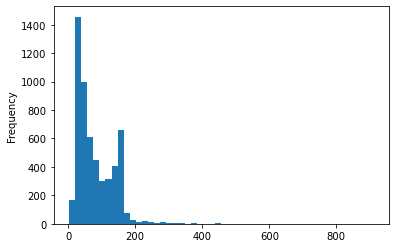

In [25]:
messages['length'].plot.hist(bins=50)

In [26]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [34]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

# HAM VS SPAM

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024B0EF01308>,
      dtype=object)

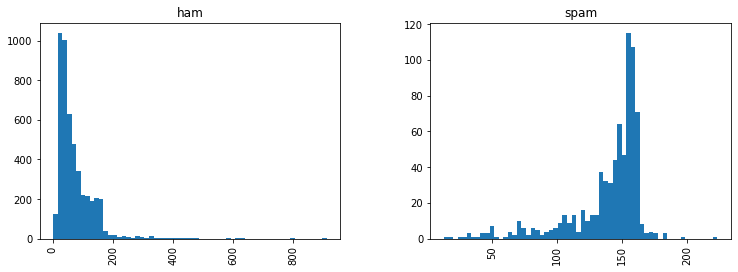

In [35]:
messages.hist(column='length',by='label',bins=60,figsize=(12,4))

# TEXT PROCESSING

#### Our main issue with our data is that it is all in text format (strings). The classification algorithms that we've learned about so far will need some sort of numerical feature vector in order to perform the classification task. There are actually many methods to convert a corpus to a vector format. The simplest is the the [bag-of-words](http://en.wikipedia.org/wiki/Bag-of-words_model) approach, where each unique word in a text will be represented by one number.

# BAG OF WORDS

- #### The bag-of-words model is a simplifying representation used in natural language processing and information retrieval (IR). In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity

- #### The bag-of-words model is commonly used in methods of document classification where the (frequency of) occurrence of each word is used as a feature for training a classifier.

## Example implementation

#### The following models a text document using bag-of-words. Here are two simple text documents:

- `(1) John likes to watch movies. Mary likes movies too.`
- `(2) Mary also likes to watch football games.`

#### Based on these two text documents, a list is constructed as follows for each document:

`"John","likes","to","watch","movies","Mary","likes","movies","too"`

`"Mary","also","likes","to","watch","football","games"`

#### Representing each bag-of-words as a JSON object, and attributing to the respective JavaScript variable:

`BoW1 = {"John":1,"likes":2,"to":1,"watch":1,"movies":2,"Mary":1,"too":1};`

`BoW2 = {"Mary":1,"also":1,"likes":1,"to":1,"watch":1,"football":1,"games":1};`

#### Each key is the word, and each value is the number of occurrences of that word in the given text document.

#### The order of elements is free, so, for example `{"too":1,"Mary":1,"movies":2,"John":1,"watch":1,"likes":2,"to":1}` is also equivalent to BoW1. It is also what we expect from a strict JSON object representation.


#### In this section we'll convert the raw messages (sequence of characters) into vectors (sequences of numbers).

#### As a first step, let's write a function that will split a message into its individual words and return a list. We'll also remove very common words, ('the', 'a', etc..). To do this we will take advantage of the NLTK library. It's pretty much the standard library in Python for processing text and has a lot of useful features. We'll only use some of the basic ones here.

#### Let's create a function that will process the string in the message column, then we can just use **apply()** in pandas do process all the text in the DataFrame.

#### First removing punctuation. We can just take advantage of Python's built-in **string** library to get a quick list of all the possible punctuation:

In [36]:
import string

In [37]:
mess='Sample message! Notice: it has punctuation.'

In [38]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

#### Check characters to see if they are in punctuation

In [40]:
nopunc = [c for c in mess if c not in string.punctuation]
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [41]:
nopunc=''.join(nopunc)

In [42]:
nopunc

'Sample message Notice it has punctuation'

#### Now let's see how to remove stopwords. We can impot a list of english stopwords from NLTK (check the documentation for more languages and info).

## What is Stopwords?
- ### A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

- ### We would not want these words to take up space in our database, or taking up valuable processing time. For this, we can remove them easily, by storing a list of words that you consider to stop words

In [43]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [44]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

### Removing Stopwords

In [45]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [46]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

#### Let's make function which do these all things for me

In [47]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [48]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## What is Tokenization in NLP?

- ### Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

# VECTORIZATION

#### Currently, we have the messages as lists of tokens (also known as [lemmas](http://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.

#### Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

#### We'll do that in three steps using the bag-of-words model:

- #### Count how many times does a word occur in each message (Known as term frequency)

- #### Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

- #### Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

#### Let's begin the first step:

#### Each vector will have as many dimensions as there are unique words in the SMS corpus.  We will first use SciKit Learn's **CountVectorizer**. This model will convert a collection of text documents to a matrix of token counts.

#### We can imagine this as a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message. 

## For example:

<table border = “1“>
<tr>
<th></th> <th>Message 1</th> <th>Message 2</th> <th>...</th> <th>Message N</th> 
</tr>
<tr>
<td><b>Word 1 Count</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word 2 Count</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word N Count</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>


#### Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a [Sparse Matrix](https://en.wikipedia.org/wiki/Sparse_matrix).

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

In [56]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [58]:
print("Total number of vocablory is",len(bow_transformer.vocabulary_))

Total number of vocablory is 11425


#### Let's take one text message and get its bag-of-words counts as a vector, putting to use our new `bow_transformer`

In [59]:
message4 = messages['message'][3]
print(message4)

U dun say so early hor... U c already then say...


In [60]:
bow4 = bow_transformer.transform([message4])
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [62]:
print(bow_transformer.get_feature_names()[4068])
print(bow_transformer.get_feature_names()[4629])
print(bow_transformer.get_feature_names()[5261])
print(bow_transformer.get_feature_names()[6204])
print(bow_transformer.get_feature_names()[6222])
print(bow_transformer.get_feature_names()[7186])
print(bow_transformer.get_feature_names()[9554])

U
already
c
dun
early
hor
say


In [63]:
messages_bow = bow_transformer.transform(messages['message'])

In [64]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


In [65]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


## What is TF-IDF?

#### TF-IDF stands for `term frequency-inverse document frequency`, and the tf-idf weight is a weight often used in information retrieval and text mining. `This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus.` The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

#### One of the simplest ranking functions is computed by summing the tf-idf for each query term; many more sophisticated ranking functions are variants of this simple model.

#### Typically, the tf-idf weight is composed by two terms: the first computes the normalized `Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document`;` the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.`

#### `TF: Term Frequency`, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

#### `TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).`

#### `IDF: Inverse Document Frequency`, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

#### `IDF(t) = log_e(Total number of documents / Number of documents with term t in it).`

#### See below for a simple example.

#### **Example:**

#### Consider a document containing 100 words wherein the word cat appears 3 times. 

#### The term frequency (i.e., tf) for cat is then `(3 / 100) = 0.03`. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as `log(10,000,000 / 1,000) = 4`. Thus, the Tf-idf weight is the product of these quantities: `0.03 * 4 = 0.12.`
____

#### Let's go ahead and see how we can do this in SciKit Learn:

In [67]:
from sklearn.feature_extraction.text import TfidfTransformer

In [68]:
tfidf_transformer = TfidfTransformer().fit(messages_bow) 

#### Lets do it on `messages['message'][3]`

In [69]:
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [72]:
print(bow_transformer.get_feature_names()[9554])
print(bow_transformer.get_feature_names()[4629])

say
already


#### We'll go ahead and check what is the IDF (inverse document frequency) of the word `"u"` and of word `"university"`?

In [73]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.2800524267409408
8.527076498901426


In [74]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11425)


# TRAINING A MODEL

## Here we are choosing `Naive Bayes Classifier for Text Classification`

#### The Naive Bayes classifier is a simple classifier that classifies based on probabilities of events. It is the applied commonly to text classification. Though it is a simple algorithm, it performs well in many text classification problems.
#### Other Pros include less training time and less training data. That is, less CPU and Memory consumption.

### Checkout This Article for better understanding

#### https://medium.com/analytics-vidhya/naive-bayes-classifier-for-text-classification-556fabaf252b

In [75]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

#### Let's try classifying our single random message and checking how we do:

In [77]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', messages.label[3])

predicted: ham
expected: ham


# Model Evaluation

In [78]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png' width=400 />

In [79]:
from sklearn.metrics import classification_report
print (classification_report(messages['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



# TRAIN TEST SPLIT

In [80]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.2)

# CREATING DATA PIPELINE

In [81]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [82]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000024B0F240A68>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [83]:
predictions = pipeline.predict(msg_test)

In [84]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1013
        spam       0.72      1.00      0.84       102

    accuracy                           0.96      1115
   macro avg       0.86      0.98      0.91      1115
weighted avg       0.97      0.96      0.97      1115



# Resources for `WORKING WITH TEXT DATA`

#### LINK - https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html


In [145]:
print(msg_train[3897])

tells u 2 call 09066358152 to claim £5000 prize. U have 2 enter all ur mobile & personal details @ the prompts. Careful!


In [143]:
print(label_train)

3731     ham
2942     ham
1768     ham
1740     ham
3537     ham
        ... 
5053     ham
4829     ham
3897    spam
2979     ham
1334     ham
Name: label, Length: 4457, dtype: object


In [146]:
test_msg = msg_train[3897]

In [147]:
pred=pipeline.predict([test_msg])

In [148]:
print(pred)

['spam']
